In [1]:
# Standard library imports
import math
import matplotlib.pyplot as plt
import numpy as np
from numpy import loadtxt
from numpy import unique
from numpy import percentile
import os
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.impute import SimpleImputer


In [9]:
import folium
from folium import plugins
import ipywidgets

import geopy
from vega_datasets import data as vds
from geopy.geocoders import Nominatim

In [2]:
# Read the csv file into a new dataframe
wildf = pd.read_csv('blazes/fires_v4.csv')

In [3]:
# Make a copy
wildf_dfv4 = wildf.copy()

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [5]:
wildf_dfv4.shape

(96, 10)

In [6]:
# Create a class column for feeding to machine learning algorithms
i = 0
for item in wildf_dfv4['Perimeter Contained (%)']:
    if not math.isnan(item):
        if item == 100.0:
            wildf_dfv4.at[i, 'Fire Contained'] = 'Yes'
            i+=1
        else:
            wildf_dfv4.at[i, 'Fire Contained'] = 'No'
            i+=1
    else:
        wildf_dfv4.at[i, 'Fire Contained'] = None
        i+=1
    

In [131]:
wildf_dfv4.drop(['Fire Contained'], axis=1, inplace=True)

In [133]:
wildf_dfv4.sort_values(by=['Region'])

,Cause,Fuels Involved,Perimeter Contained (%),Personnel Involved,Fire Size (Acres),Latitude,Longitude,ISO Date,Region,Fire Contained
14,Lightning,"Timber (grass and understory),Brush (2 feet),Smoldering in the interior of the burn.",69.0,249.0,12180.0,65.854,-149.579,2020-06-05T15:15:00,Alaska,No
26,Lightning,"Brush, tall grass, and hardwood litter. Heavy grass crop and dry light brush are the primary carriers of the fire.",67.0,288.0,28051.0,33.479,-110.298,2020-07-12T09:30:00,Arizona,No
25,Lightning,NaN,92.0,177.0,628.0,34.266,-111.540,2020-07-03T15:00:00,Arizona,No
24,Lightning,Grass and brush,100.0,10.0,2306.0,NaN,NaN,2020-07-11T22:00:00,Arizona,Yes
23,Human Caused,"Chaparral (6 feet),Tall Grass (2.5 feet)",90.0,11.0,502.0,31.444,-111.418,2020-07-06T19:32:00,Arizona,No
40,Under Investigation,NaN,100.0,NaN,71450.0,NaN,NaN,2020-06-08T15:00:00,Arizona,Yes
41,Lightning,"grass, brush, pinyon/juniper",100.0,3.0,8354.0,36.331,-112.573,2020-07-16T06:00:00,Arizona,Yes
43,Lightning,Primary carrier is grass with timber litter in the conifer stringers and timber stands. Brush patches add areas of intensity but are not currently contributing significantly to spread.,100.0,NaN,23142.0,33.415,-109.312,2020-07-06T09:08:00,Arizona,Yes
19,Human Caused,CWZ Type 3 Team will transition the incident back to Tonto National Forest Management 7/2.,100.0,20.0,193455.0,NaN,NaN,2020-06-13T14:00:00,Arizona,Yes
17,Lightning,NaN,100.0,NaN,24729.0,33.419,-111.301,2020-05-30T22:00:00,Arizona,Yes


In [134]:
# summarize the number of rows with missing values for each column
for i in wildf_dfv4.columns:
    # count the number of rows with missing values
    n_miss = wildf_dfv4[[i]].isnull().sum()
    perc = n_miss/wildf_dfv4.shape[0]*100
    print('> %s, Missing: %d (%.1f%%)' % (i,n_miss, perc))

> Cause, Missing: 14 (14.6%)
> Fuels Involved, Missing: 63 (65.6%)
> Perimeter Contained (%), Missing: 14 (14.6%)
> Personnel Involved, Missing: 23 (24.0%)
> Fire Size (Acres), Missing: 4 (4.2%)
> Latitude, Missing: 36 (37.5%)
> Longitude, Missing: 36 (37.5%)
> ISO Date, Missing: 4 (4.2%)
> Region, Missing: 0 (0.0%)
> Fire Contained, Missing: 14 (14.6%)


In [29]:
wildf_dfv4.loc[['Fire Size (Acres)','Personnel Involved','Perimeter Contained (%)'] ].isnull(),['Fire Size (Acres)','Personnel Involved','Perimeter Contained (%)']

KeyError: "None of [Index(['Fire Size (Acres)', 'Personnel Involved', 'Perimeter Contained (%)'], dtype='object')] are in the [index]"

In [31]:
exclude = ['Latitude','Longitude']
wildf_dfv4.loc[:, wildf_dfv4.columns.difference(exclude, sort=False)].describe()

,Perimeter Contained (%),Personnel Involved,Fire Size (Acres)
count,82.000000,73.000000,92.000000
mean,83.951220,177.246575,11247.043478
std,27.603857,288.721549,27893.111450
min,3.000000,1.000000,1.000000
25%,84.250000,20.000000,177.750000
50%,98.500000,92.000000,1383.500000
75%,100.000000,201.000000,8989.250000
max,100.000000,1563.000000,193455.000000


In [63]:
# Number of unique values for each column
counts = wildf_dfv4.nunique()
print(counts)

Cause                       8
Fuels Involved             31
Perimeter Contained (%)    23
Personnel Involved         60
Fire Size (Acres)          90
Latitude                   60
Longitude                  60
ISO Date                   91
Region                     16
dtype: int64


In [56]:
# Get the column name from its index where unique values is one
for i,v in enumerate(counts):
    if v==1:
        to_drop = wildf_dfv4.columns[i]        

Incident Type : 1


In [57]:
# Drop column that contains only one unique value
wildf_dfv4.drop(to_drop, axis = 1, inplace=True)

In [61]:
wildf_dfv4.shape

(96, 9)

Text(0, 0.5, 'Perimeter')

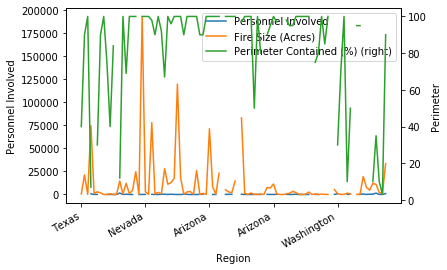

In [64]:
fig = plt.figure()
ax = fig.add_subplot(111)
wildf_dfv4.plot(x='Region', y=['Personnel Involved', 'Fire Size (Acres)'],ax=ax)
wildf_dfv4.plot(x='Region', y='Perimeter Contained (%)', secondary_y=True, ax= ax)
fig.autofmt_xdate()
ax.set_ylabel('Personnel Involved')
ax.right_ax.set_ylabel('Perimeter')

In [67]:
cause_counts = wildf_dfv4['Cause'].value_counts()

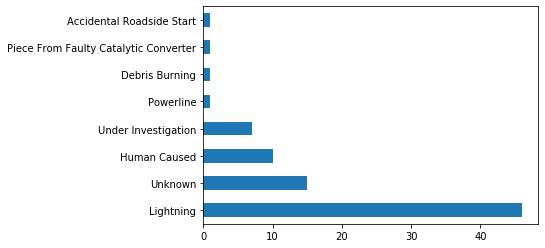

In [76]:
cause_counts.plot.barh()
#plt.xticks(rotation=-45)

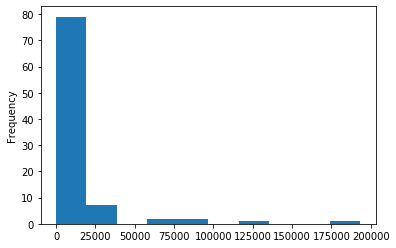

In [79]:
wildf_dfv4['Fire Size (Acres)'].plot.hist()

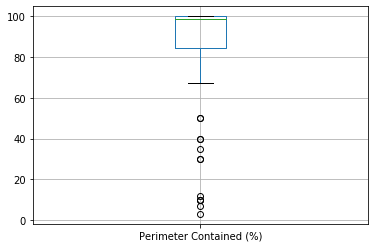

In [93]:
wild.boxplot(column=['Perimeter Contained (%)'], return_type='axes')

In [88]:
# Drop NaN values and save to a new dataframe
wild = wildf_dfv4[wildf_dfv4['Perimeter Contained (%)'].notna()]

In [101]:
'''Identify and drop outliers using Interquartile Range (IQR)'''
# get IQR
q25, q75 = percentile(wild['Perimeter Contained (%)'], 25),percentile(wild['Perimeter Contained (%)'], 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# get outlier cutoff
cut_off = iqr*1.5
lower, upper = q25 - cut_off, q75 + cut_off
# spot outliers
outliers = [x for x in wild['Perimeter Contained (%)'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
print(outliers)
print(lower, upper)
for out in outliers:
    if out < lower:
        print(out, '<', 'lower value:',lower)
    elif out > upper:
        print('upper value:', upper, '>', out)

Percentiles: 25th=84.250, 75th=100.000, IQR=15.750
Identified outliers: 13
[40.0, 7.0, 30.0, 40.0, 12.0, 50.0, 30.0, 10.0, 50.0, 10.0, 35.0, 10.0, 3.0]
60.625 123.625
40.0 < lower value: 60.625
7.0 < lower value: 60.625
30.0 < lower value: 60.625
40.0 < lower value: 60.625
12.0 < lower value: 60.625
50.0 < lower value: 60.625
30.0 < lower value: 60.625
10.0 < lower value: 60.625
50.0 < lower value: 60.625
10.0 < lower value: 60.625
35.0 < lower value: 60.625
10.0 < lower value: 60.625
3.0 < lower value: 60.625


In [102]:
wildf_dfv4.describe()

,Perimeter Contained (%),Personnel Involved,Fire Size (Acres),Latitude,Longitude
count,82.000000,73.000000,92.000000,60.000000,60.000000
mean,83.951220,177.246575,11247.043478,38.619400,-111.151850
std,27.603857,288.721549,27893.111450,6.304743,8.795239
min,3.000000,1.000000,1.000000,30.093000,-149.579000
25%,84.250000,20.000000,177.750000,33.527750,-117.335750
50%,98.500000,92.000000,1383.500000,37.918500,-110.359000
75%,100.000000,201.000000,8989.250000,42.656250,-106.614750
max,100.000000,1563.000000,193455.000000,65.854000,-97.203000


In [107]:
# Summarize number of missing values
wildf_dfv4[['Personnel Involved','Perimeter Contained (%)','Fire Size (Acres)']].isnull().sum()
           

Personnel Involved         23
Perimeter Contained (%)    14
Fire Size (Acres)           4
dtype: int64

In [141]:
bin = preprocessing.LabelBinarizer()

In [145]:
wild = wildf_dfv4[wildf_dfv4['Fire Contained'].notna()]

In [146]:
bin.fit(wild['Fire Contained'])

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [147]:
bin.classes_

array(['No', 'Yes'], dtype='<U3')

In [175]:
wild2 = wildf_dfv4.copy()

In [176]:
data = wild2.values

In [162]:
data.shape

(96, 10)

In [177]:
X, y = data[:, 2], data[:, 9]

In [182]:
X =X.reshape(-1,1)

In [170]:
print('Missing: %d' % X.isnull().sum())

AttributeError: 'numpy.ndarray' object has no attribute 'isnull'

In [191]:
imputer =  SimpleImputer(strategy='mean')
imputer.fit(X)
Xtrans = imputer.transform(X)
print('Missing: %d' % sum(np.isnan(X).flatten()))

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [194]:
sum(np.isnan(X))

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [195]:
type(Xtrans)

numpy.ndarray